In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


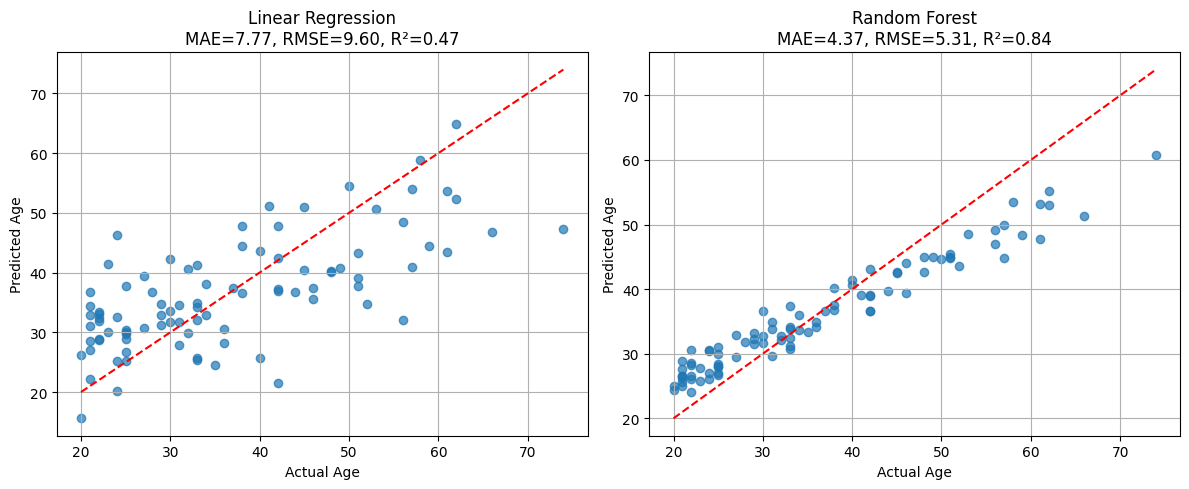

Linear Regression:
  MAE:  7.77
  RMSE: 9.60
  R²:   0.47

Random Forest:
  MAE:  4.37
  RMSE: 5.31
  R²:   0.84


In [8]:
# --- SETUP ---
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- LOAD DATA ---
df = pd.read_csv("/content/drive/My Drive/Gladyshev/data/crema-d-mirror-main/audio_summary_full_parallel.csv")  # Replace with your file path if needed
df["actor_id"] = df["filename"].str.extract(r"^(\d+)_")

# --- AGGREGATE FEATURES PER ACTOR ---
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(["age"])
grouped_stats = df.groupby("actor_id")[["age"] + list(numeric_cols)].agg(["mean", "std"])
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]
grouped_stats.reset_index(inplace=True)

# --- PREPARE DATA ---
feature_cols = [col for col in grouped_stats.columns if col.startswith(tuple(numeric_cols)) and col != "age_mean" and col != "age_std"]
X = grouped_stats[feature_cols].dropna()
y = grouped_stats.loc[X.index, "age_mean"]

# --- LINEAR REGRESSION ---
linreg = LinearRegression()
linreg.fit(X, y)
y_pred_lin = linreg.predict(X)

mae_lin = mean_absolute_error(y, y_pred_lin)
rmse_lin = sqrt(mean_squared_error(y, y_pred_lin))  # Manual RMSE
r2_lin = r2_score(y, y_pred_lin)

# --- RANDOM FOREST REGRESSION ---
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)
y_pred_rf = rf.predict(X)

mae_rf = mean_absolute_error(y, y_pred_rf)
rmse_rf = sqrt(mean_squared_error(y, y_pred_rf))  # Manual RMSE
r2_rf = r2_score(y, y_pred_rf)

# --- PLOTS ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_lin, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(f"Linear Regression\nMAE={mae_lin:.2f}, RMSE={rmse_lin:.2f}, R²={r2_lin:.2f}")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y, y_pred_rf, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(f"Random Forest\nMAE={mae_rf:.2f}, RMSE={rmse_rf:.2f}, R²={r2_rf:.2f}")
plt.grid(True)

plt.tight_layout()
plt.show()

# --- PRINT METRICS ---
print("Linear Regression:")
print(f"  MAE:  {mae_lin:.2f}")
print(f"  RMSE: {rmse_lin:.2f}")
print(f"  R²:   {r2_lin:.2f}\n")

print("Random Forest:")
print(f"  MAE:  {mae_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R²:   {r2_rf:.2f}")

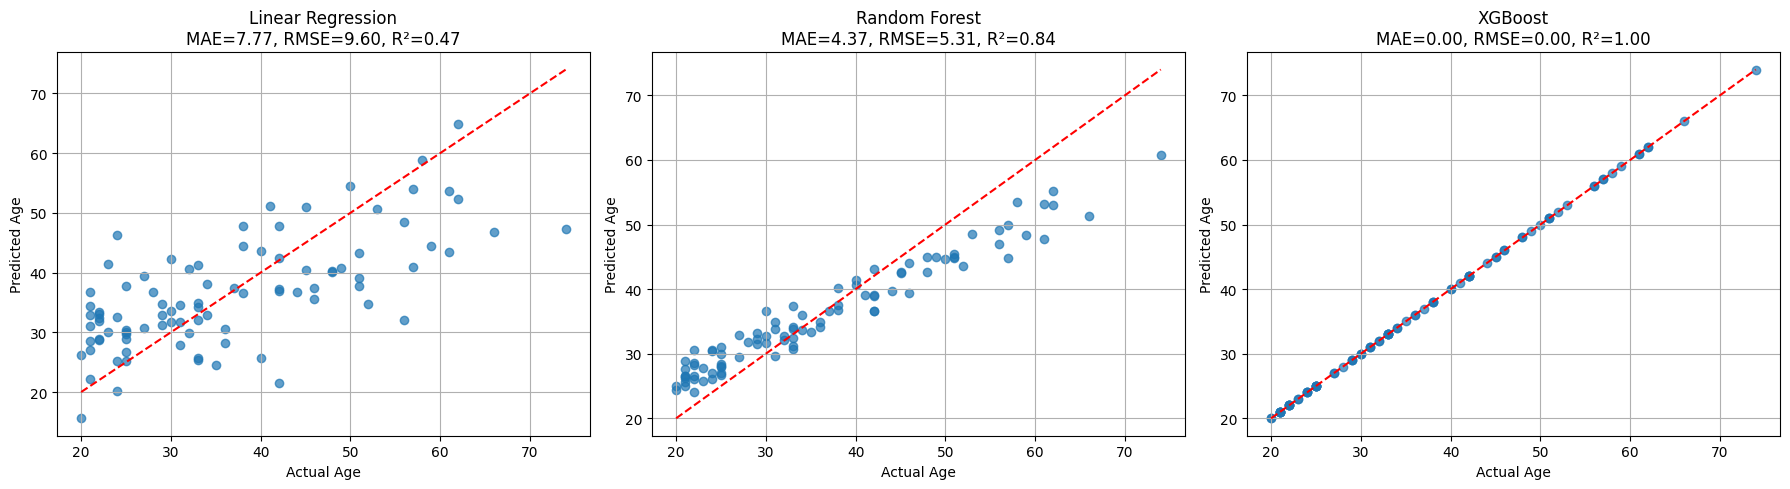

Linear Regression:
  MAE:  7.77
  RMSE: 9.60
  R²:   0.47

Random Forest:
  MAE:  4.37
  RMSE: 5.31
  R²:   0.84

XGBoost:
  MAE:  0.00
  RMSE: 0.00
  R²:   1.00


In [15]:
# --- SETUP ---
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb  # ← new

# --- LOAD DATA ---
df = pd.read_csv("/content/drive/My Drive/Gladyshev/data/crema-d-mirror-main/audio_summary_full_parallel.csv")
df["actor_id"] = df["filename"].str.extract(r"^(\d+)_")

# --- AGGREGATE FEATURES PER ACTOR ---
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(["age"])
grouped_stats = df.groupby("actor_id")[["age"] + list(numeric_cols)].agg(["mean", "std"])
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]
grouped_stats.reset_index(inplace=True)

# --- PREPARE DATA ---
feature_cols = [col for col in grouped_stats.columns if col.startswith(tuple(numeric_cols)) and col != "age_mean" and col != "age_std"]
X = grouped_stats[feature_cols].dropna()
y = grouped_stats.loc[X.index, "age_mean"]

# --- LINEAR REGRESSION ---
linreg = LinearRegression()
linreg.fit(X, y)
y_pred_lin = linreg.predict(X)

mae_lin = mean_absolute_error(y, y_pred_lin)
rmse_lin = sqrt(mean_squared_error(y, y_pred_lin))
r2_lin = r2_score(y, y_pred_lin)

# --- RANDOM FOREST REGRESSION ---
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)
y_pred_rf = rf.predict(X)

mae_rf = mean_absolute_error(y, y_pred_rf)
rmse_rf = sqrt(mean_squared_error(y, y_pred_rf))
r2_rf = r2_score(y, y_pred_rf)

# --- XGBOOST REGRESSION ---
xgbr = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=0)
xgbr.fit(X, y)
y_pred_xgb = xgbr.predict(X)

mae_xgb = mean_absolute_error(y, y_pred_xgb)
rmse_xgb = sqrt(mean_squared_error(y, y_pred_xgb))
r2_xgb = r2_score(y, y_pred_xgb)

# --- PLOTS ---
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(y, y_pred_lin, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(f"Linear Regression\nMAE={mae_lin:.2f}, RMSE={rmse_lin:.2f}, R²={r2_lin:.2f}")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(y, y_pred_rf, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(f"Random Forest\nMAE={mae_rf:.2f}, RMSE={rmse_rf:.2f}, R²={r2_rf:.2f}")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(y, y_pred_xgb, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(f"XGBoost\nMAE={mae_xgb:.2f}, RMSE={rmse_xgb:.2f}, R²={r2_xgb:.2f}")
plt.grid(True)

plt.tight_layout()
plt.show()

# --- PRINT METRICS ---
print("Linear Regression:")
print(f"  MAE:  {mae_lin:.2f}")
print(f"  RMSE: {rmse_lin:.2f}")
print(f"  R²:   {r2_lin:.2f}\n")

print("Random Forest:")
print(f"  MAE:  {mae_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R²:   {r2_rf:.2f}\n")

print("XGBoost:")
print(f"  MAE:  {mae_xgb:.2f}")
print(f"  RMSE: {rmse_xgb:.2f}")
print(f"  R²:   {r2_xgb:.2f}")

In [18]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Fit XGBoost on training set
xgbr = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=0)
xgbr.fit(X_train, y_train)

# Evaluate on test set
y_pred_xgb = xgbr.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost:")
print(f"  MAE:  {mae_xgb:.2f}")
print(f"  RMSE: {rmse_xgb:.2f}")
print(f"  R²:   {r2_xgb:.2f}")

XGBoost:
  MAE:  14.60
  RMSE: 17.48
  R²:   -0.30


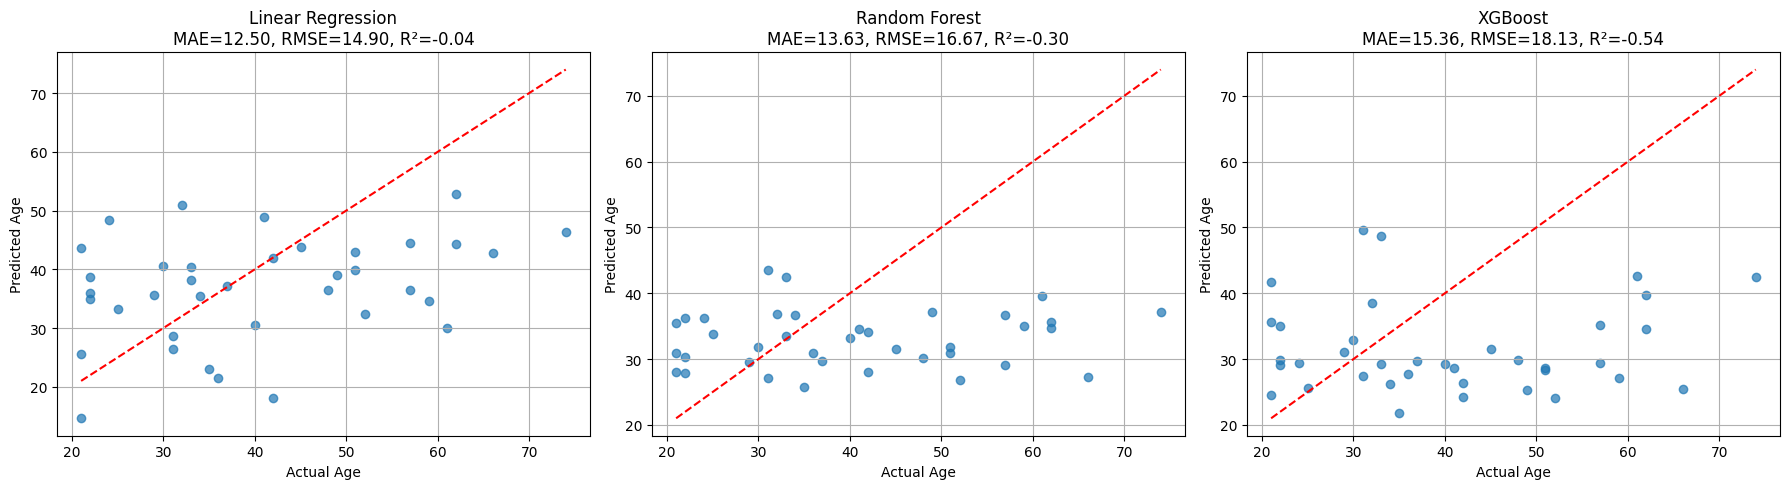

Linear Regression:
  MAE:  12.50
  RMSE: 14.90
  R²:   -0.04

Random Forest:
  MAE:  13.63
  RMSE: 16.67
  R²:   -0.30

XGBoost:
  MAE:  15.36
  RMSE: 18.13
  R²:   -0.54


In [21]:
# --- SETUP ---
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

# --- LOAD DATA ---
df = pd.read_csv("/content/drive/My Drive/Gladyshev/data/crema-d-mirror-main/audio_summary_full_parallel.csv")
df["actor_id"] = df["filename"].str.extract(r"^(\d+)_")

# --- AGGREGATE FEATURES PER ACTOR ---
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(["age"])
grouped_stats = df.groupby("actor_id")[["age"] + list(numeric_cols)].agg(["mean", "std"])
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]
grouped_stats.reset_index(inplace=True)

# --- PREPARE DATA ---
feature_cols = [col for col in grouped_stats.columns if col.startswith(tuple(numeric_cols)) and col != "age_mean" and col != "age_std"]
X = grouped_stats[feature_cols].dropna()
y = grouped_stats.loc[X.index, "age_mean"]

# --- TRAIN/TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=1)

# --- LINEAR REGRESSION ---
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

# --- RANDOM FOREST ---
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# --- XGBOOST ---
xgbr = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=0)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# --- PLOTS ---
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(f"Linear Regression\nMAE={mae_lin:.2f}, RMSE={rmse_lin:.2f}, R²={r2_lin:.2f}")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(f"Random Forest\nMAE={mae_rf:.2f}, RMSE={rmse_rf:.2f}, R²={r2_rf:.2f}")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(f"XGBoost\nMAE={mae_xgb:.2f}, RMSE={rmse_xgb:.2f}, R²={r2_xgb:.2f}")
plt.grid(True)

plt.tight_layout()
plt.show()

# --- PRINT METRICS ---
print("Linear Regression:")
print(f"  MAE:  {mae_lin:.2f}")
print(f"  RMSE: {rmse_lin:.2f}")
print(f"  R²:   {r2_lin:.2f}\n")

print("Random Forest:")
print(f"  MAE:  {mae_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R²:   {r2_rf:.2f}\n")

print("XGBoost:")
print(f"  MAE:  {mae_xgb:.2f}")
print(f"  RMSE: {rmse_xgb:.2f}")
print(f"  R²:   {r2_xgb:.2f}")

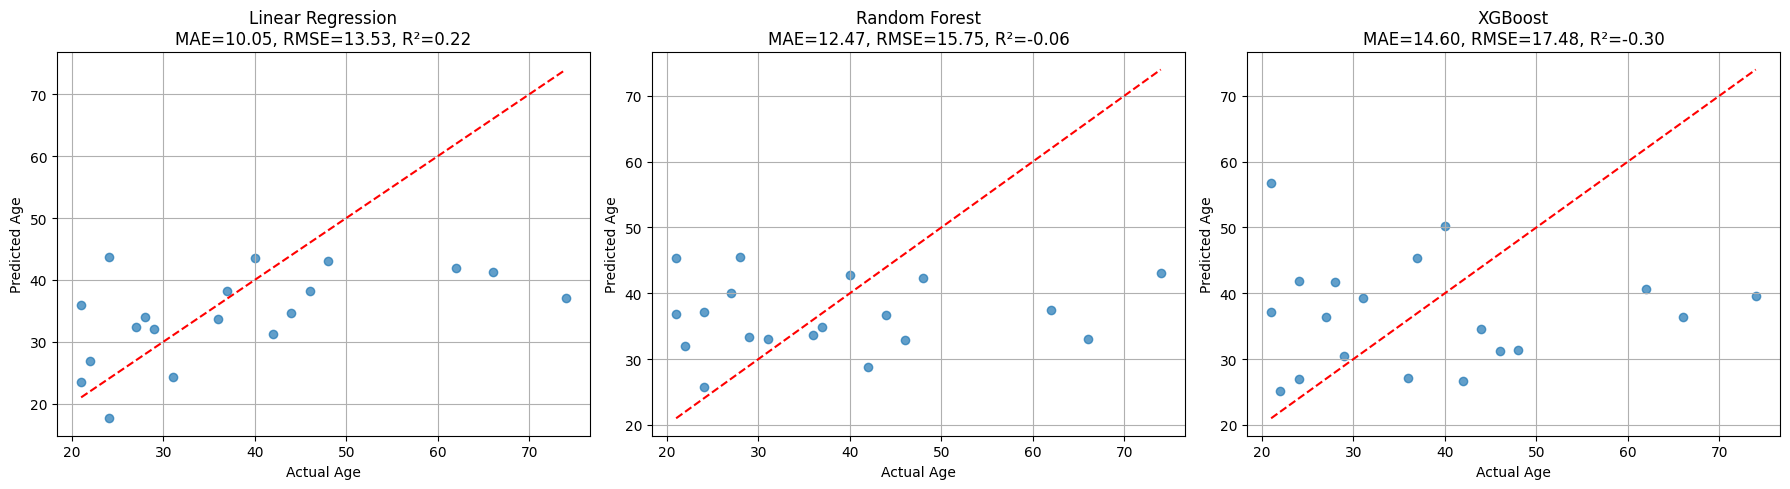

Linear Regression:
  MAE:  10.05
  RMSE: 13.53
  R²:   0.22

Random Forest:
  MAE:  12.47
  RMSE: 15.75
  R²:   -0.06

XGBoost:
  MAE:  14.60
  RMSE: 17.48
  R²:   -0.30


In [22]:
# --- SETUP ---
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# --- LOAD DATA ---
df = pd.read_csv("/content/drive/My Drive/Gladyshev/data/crema-d-mirror-main/audio_summary_full_parallel.csv")
df["actor_id"] = df["filename"].str.extract(r"^(\d+)_")

# --- AGGREGATE FEATURES PER ACTOR ---
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(["age"])
grouped_stats = df.groupby("actor_id")[["age"] + list(numeric_cols)].agg(["mean", "std"])
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]
grouped_stats.reset_index(inplace=True)

# --- PREPARE DATA ---
feature_cols = [col for col in grouped_stats.columns if col.startswith(tuple(numeric_cols)) and col not in ["age_mean", "age_std"]]
X = grouped_stats[feature_cols].dropna()
y = grouped_stats.loc[X.index, "age_mean"]

# --- TRAIN/TEST SPLIT ---
x_tr, x_te, y_tr, y_te = train_test_split(X, y, train_size=0.8, random_state=0)

# --- LINEAR REGRESSION ---
linreg = LinearRegression()
linreg.fit(x_tr, y_tr)
y_pred_lin = linreg.predict(x_te)
mae_lin = mean_absolute_error(y_te, y_pred_lin)
rmse_lin = sqrt(mean_squared_error(y_te, y_pred_lin))
r2_lin = r2_score(y_te, y_pred_lin)

# --- RANDOM FOREST ---
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(x_tr, y_tr)
y_pred_rf = rf.predict(x_te)
mae_rf = mean_absolute_error(y_te, y_pred_rf)
rmse_rf = sqrt(mean_squared_error(y_te, y_pred_rf))
r2_rf = r2_score(y_te, y_pred_rf)

# --- XGBOOST ---
xgb = XGBRegressor(n_estimators=100, random_state=0)
xgb.fit(x_tr, y_tr)
y_pred_xgb = xgb.predict(x_te)
mae_xgb = mean_absolute_error(y_te, y_pred_xgb)
rmse_xgb = sqrt(mean_squared_error(y_te, y_pred_xgb))
r2_xgb = r2_score(y_te, y_pred_xgb)

# --- PLOTTING ---
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_te, y_pred_lin, alpha=0.7)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(f"Linear Regression\nMAE={mae_lin:.2f}, RMSE={rmse_lin:.2f}, R²={r2_lin:.2f}")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(y_te, y_pred_rf, alpha=0.7)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(f"Random Forest\nMAE={mae_rf:.2f}, RMSE={rmse_rf:.2f}, R²={r2_rf:.2f}")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(y_te, y_pred_xgb, alpha=0.7)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(f"XGBoost\nMAE={mae_xgb:.2f}, RMSE={rmse_xgb:.2f}, R²={r2_xgb:.2f}")
plt.grid(True)

plt.tight_layout()
plt.show()

# --- PRINT METRICS ---
print("Linear Regression:")
print(f"  MAE:  {mae_lin:.2f}")
print(f"  RMSE: {rmse_lin:.2f}")
print(f"  R²:   {r2_lin:.2f}\n")

print("Random Forest:")
print(f"  MAE:  {mae_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R²:   {r2_rf:.2f}\n")

print("XGBoost:")
print(f"  MAE:  {mae_xgb:.2f}")
print(f"  RMSE: {rmse_xgb:.2f}")
print(f"  R²:   {r2_xgb:.2f}")


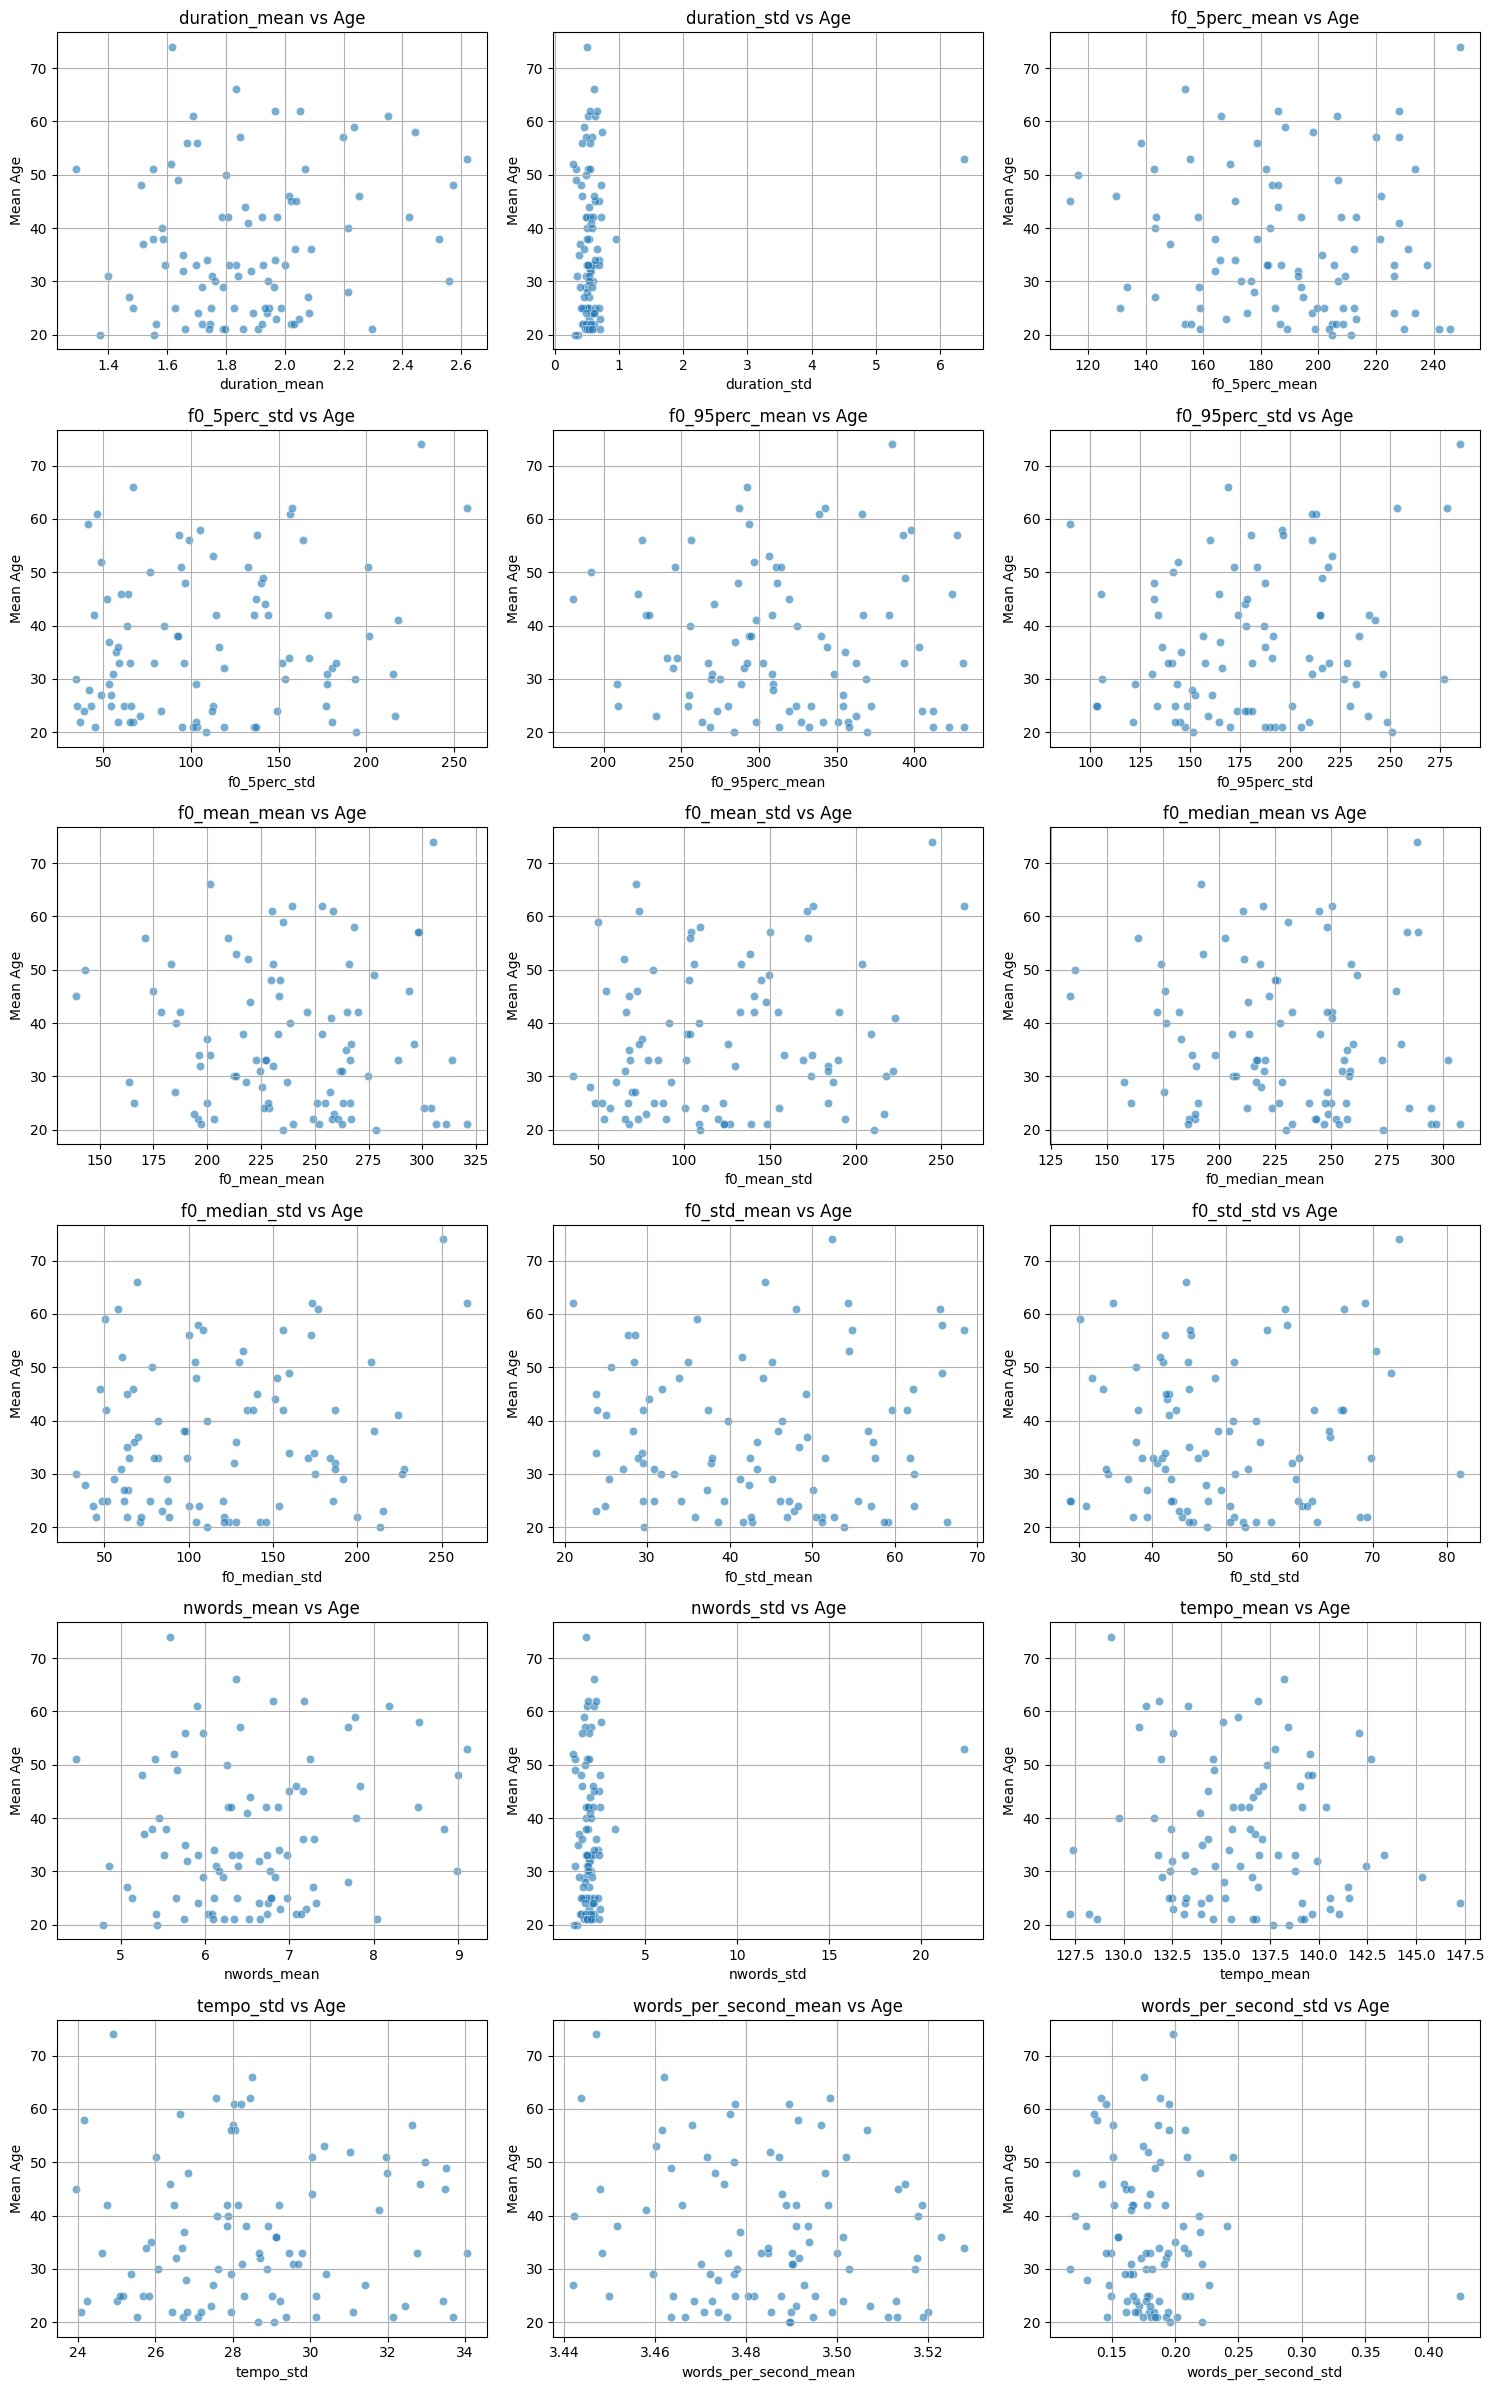

In [5]:
# --- SCATTER PLOTS: EACH FEATURE VS AGE ---
import seaborn as sns

# Plot each feature against mean age
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(feature_cols) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(feature_cols):
    ax = axs[i]
    sns.scatterplot(data=grouped_stats, x=col, y="age_mean", ax=ax, alpha=0.6)
    ax.set_title(f"{col} vs Age")
    ax.set_xlabel(col)
    ax.set_ylabel("Mean Age")
    ax.grid(True)

# Hide unused axes if any
for j in range(len(feature_cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


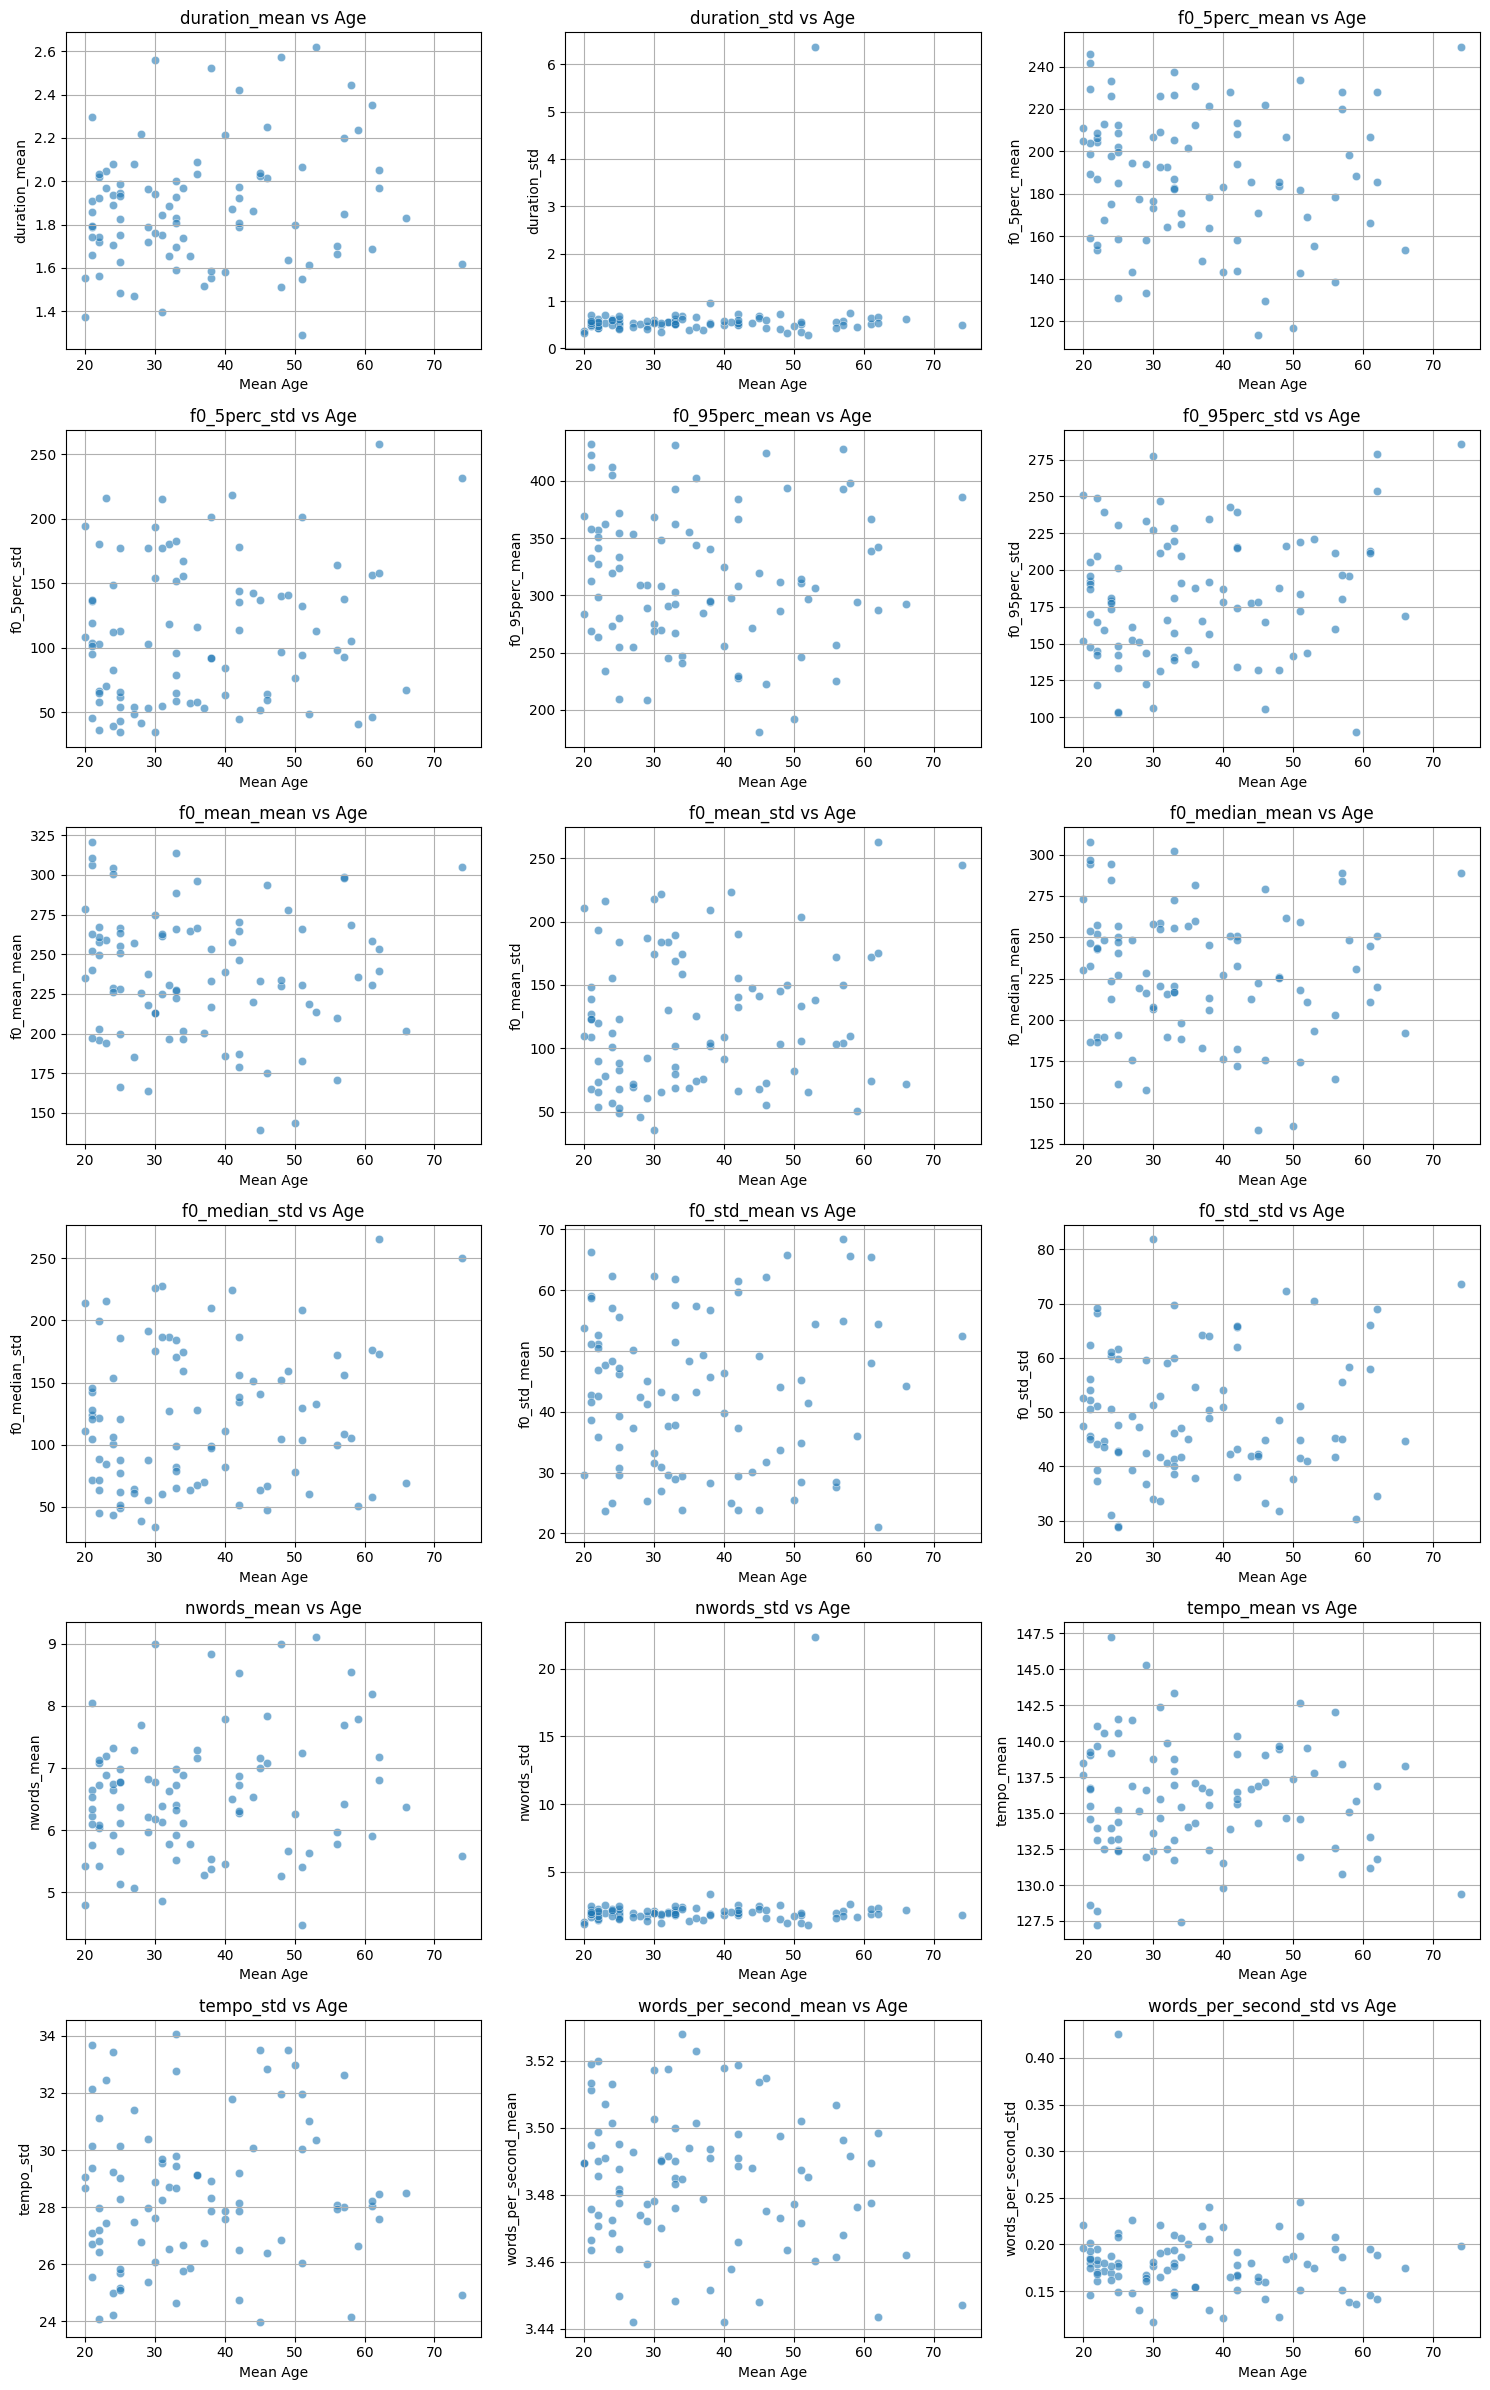

In [6]:
# --- SCATTER PLOTS: AGE ON X-AXIS, FEATURE ON Y-AXIS ---
import seaborn as sns

# Plot settings
n_cols = 3  # Number of plots per row
n_rows = int(np.ceil(len(feature_cols) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(feature_cols):
    ax = axs[i]
    sns.scatterplot(data=grouped_stats, x="age_mean", y=col, ax=ax, alpha=0.6)
    ax.set_title(f"{col} vs Age")
    ax.set_xlabel("Mean Age")
    ax.set_ylabel(col)
    ax.grid(True)

# Hide any unused axes
for j in range(len(feature_cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


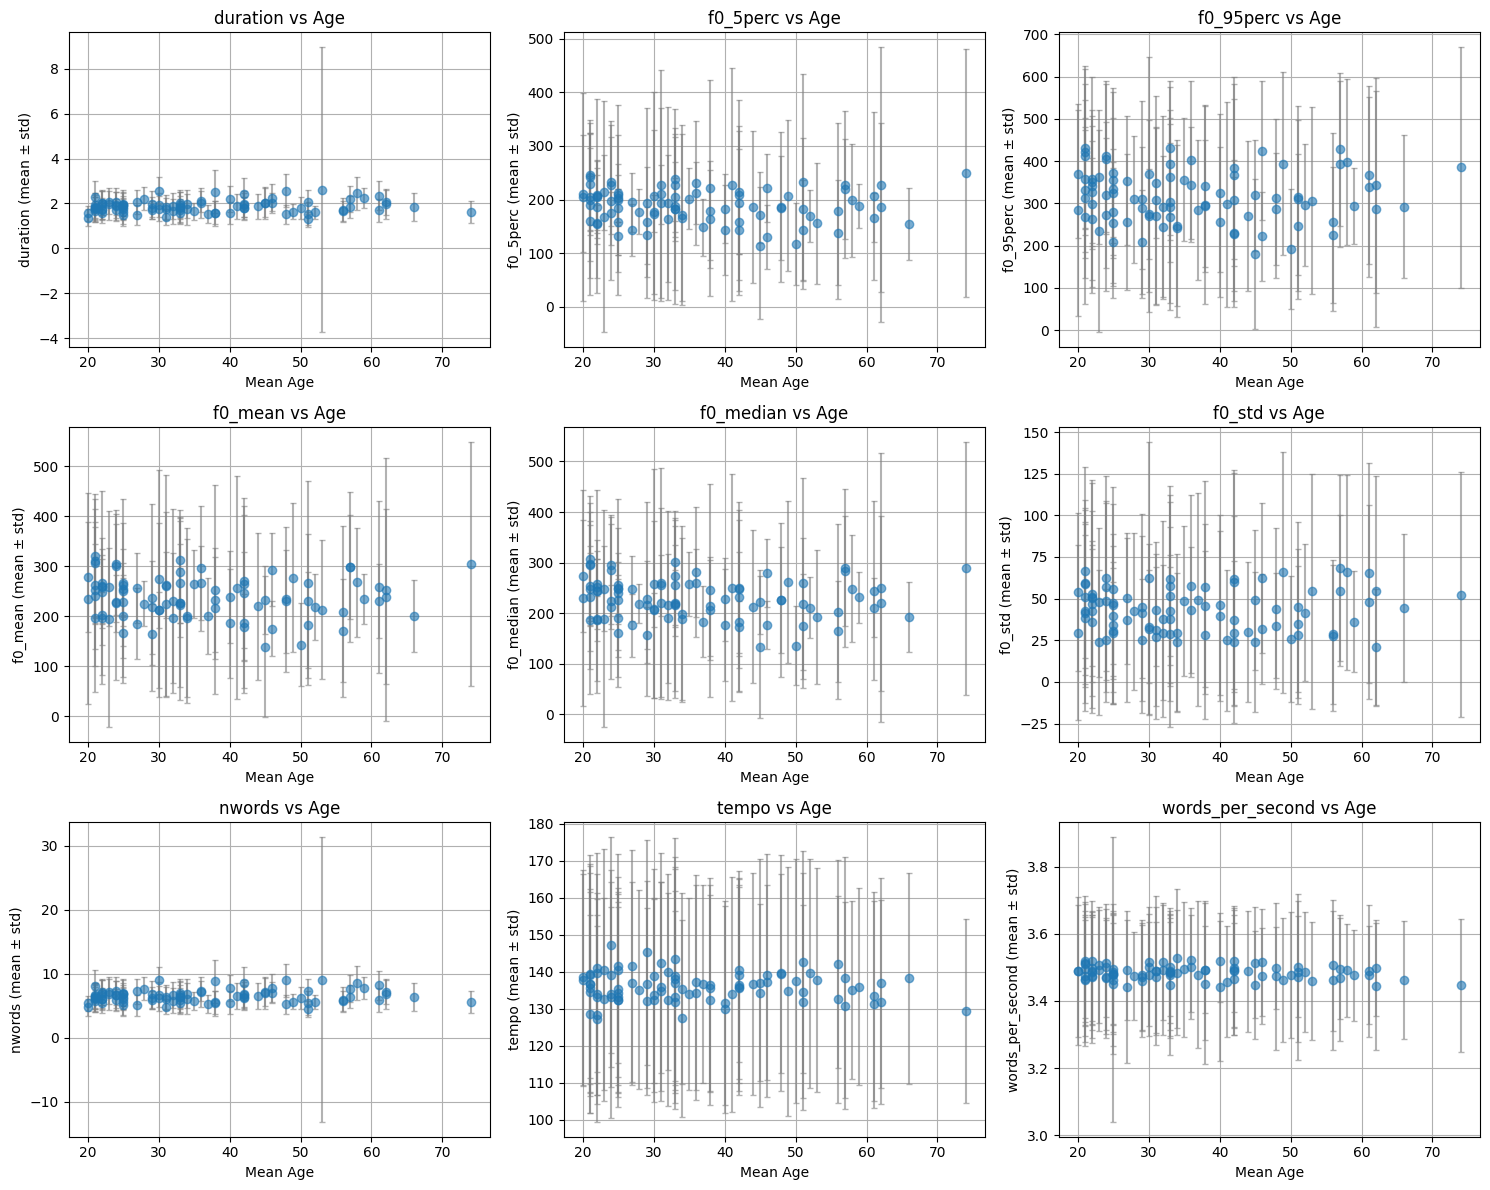

In [7]:
# --- SCATTER PLOTS WITH ERROR BARS: AGE ON X, MEAN FEATURE VALUE ON Y ---

n_cols = 3  # Number of plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    ax = axs[i]

    x = grouped_stats["age_mean"]
    y = grouped_stats[f"{col}_mean"]
    yerr = grouped_stats[f"{col}_std"]

    ax.errorbar(x, y, yerr=yerr, fmt='o', alpha=0.6, ecolor='gray', capsize=2)
    ax.set_title(f"{col} vs Age")
    ax.set_xlabel("Mean Age")
    ax.set_ylabel(f"{col} (mean ± std)")
    ax.grid(True)

# Hide any unused axes
for j in range(len(numeric_cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [12]:
# Two helper functions for audio data preparation

import os
import librosa

def resize_spectrogram(spec, length, fact=-80):

    # Create an empty canvas to put spectrogram into
    canvas = np.ones((len(spec), length)) * fact

    if spec.shape[1] <= length:
        canvas[:, : spec.shape[1]] = spec
    else:
        canvas[:, :length] = spec[:, :length]
    return canvas

def compute_mel_spec(filename, sr=16_000, hop_length=512, duration=3.0):

    # Loads the mp3 file
    y, sr = librosa.load(os.path.join("/content/drive/My Drive/Gladyshev/data/crema-d-mirror-main/AudioMP3", filename), sr=sr)

    # Compute the mel spectrogram
    x_mel = librosa.feature.melspectrogram(y=y, sr=sr)

    # Apply logarithmic dB-scale to spectrogram and set maximum to 0 dB
    x_mel = librosa.power_to_db(x_mel, ref=np.max)

    # Compute mean strength per frequency for mel spectrogram
    mel_strength = np.mean(x_mel, axis=1)

    # Estimate the desired length of the spectrogram
    length = int(duration * sr / hop_length)

    # Put mel spectrogram into the right shape
    x_mel = resize_spectrogram(x_mel, length, fact=-80)

    return x_mel, mel_strength

In [13]:
from tqdm.notebook import tqdm

# Create arrays to store output into
spec_infos = []

# Loop through all files and extract spectrograms
sr = 16_000
for f in tqdm(df.filename):
    spec_infos.append(compute_mel_spec(f, sr=sr))

# Aggregate feature types in common variable
mels = np.array([s[0] for s in spec_infos])
mels_strengths = np.array([s[1] for s in spec_infos])

  0%|          | 0/7442 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
import librosa.display

# Creates a figure with two subplot
fig, axs = plt.subplots(1, 3, figsize=(16, 3))

# Plots mel spectrogram for male speakers
mels_male = np.mean(mels[df["gender"].eq(0)], axis=0)
librosa.display.specshow(mels_male, sr=sr, x_axis="time", y_axis="mel", ax=axs[0])
axs[0].set_title("male")

# Plots mel spectrogram for female speakers
mels_female = np.mean(mels[df["gender"].eq(1)], axis=0)
librosa.display.specshow(mels_female, sr=sr, x_axis="time", y_axis="mel", ax=axs[1])
axs[1].set_title("female")

# Plot gender differences
librosa.display.specshow(
    mels_male - mels_female, sr=sr, x_axis="time", y_axis="mel", ax=axs[2]
)
axs[2].set_title("Difference")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Select target
target = "age"
y = df[target].values

# Select relevant features from the dataframe
features = df.drop(columns=["filename", target]).reset_index(drop=True)

# Combine them with the mels strength features
X = pd.concat((features, pd.DataFrame(mels_strengths)), axis=1)

# Create train and test set
x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, train_size=0.8, shuffle=True, stratify=y, random_state=0
)

# Plot size of dataset
print(x_tr.shape)

separate

In [10]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# One-hot encode categorical columns in features (e.g., 'gender')
features_encoded = pd.get_dummies(features)

# Combine features and mel strengths
X = pd.concat([features_encoded, pd.DataFrame(mels_strengths)], axis=1)
X.columns = X.columns.astype(str)

# Target variable
y = df["age"].values

# Train/test split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, train_size=0.8, shuffle=True, random_state=0
)

# Pipeline with imputation step
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", RobustScaler()),  # placeholder
    ("pca", PCA()),              # placeholder
    ("regressor", Ridge())
])

# Grid search space
grid = {
    "scaler": [RobustScaler(), PowerTransformer(), QuantileTransformer()],
    "pca": [None, PCA(0.99)],
    "regressor__alpha": np.logspace(-3, 2, num=16),
}

# Grid search with 4-fold CV
grid_cv = GridSearchCV(pipe, grid, cv=4, return_train_score=True, verbose=1)
model = grid_cv.fit(x_tr, y_tr)

# Results
cv_results = pd.DataFrame(grid_cv.cv_results_)[[
    "param_scaler", "param_pca", "param_regressor__alpha",
    "mean_test_score", "mean_train_score",
    "std_test_score", "std_train_score"
]]

# Show top configs
display(cv_results.sort_values("mean_test_score", ascending=False))

# Plotting
combinations = list(product(grid["scaler"], grid["pca"]))
fig, axs = plt.subplots(len(grid["scaler"]), len(grid["pca"]), figsize=(12, 10), sharey=True)
max_score = cv_results["mean_test_score"].max()
alphas = cv_results["param_regressor__alpha"]

for i, (s, p) in enumerate(combinations):
    mask = (
        cv_results["param_pca"].astype("str") == str(p)
    ) & (
        cv_results["param_scaler"].astype("str") == str(s)
    )
    df_cv = cv_results[mask].sort_values("param_regressor__alpha").set_index("param_regressor__alpha")
    ax = axs.flatten()[i]
    df_cv[["mean_train_score", "mean_test_score"]].plot(logx=True, title=f"{s} | {p}", ax=ax)
    ax.fill_between(df_cv.index,
                    df_cv["mean_train_score"] - df_cv["std_train_score"],
                    df_cv["mean_train_score"] + df_cv["std_train_score"],
                    alpha=0.3)
    ax.fill_between(df_cv.index,
                    df_cv["mean_test_score"] - df_cv["std_test_score"],
                    df_cv["mean_test_score"] + df_cv["std_test_score"],
                    alpha=0.3)
    ax.hlines(max_score, alphas.min(), alphas.max(), color="gray", linestyles="dotted")

plt.tight_layout()
plt.show()

# Evaluate on test set
best_regressor = model.best_estimator_
y_pred = best_regressor.predict(x_te)

# Mean Absolute Error
mae = mean_absolute_error(y_te, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f} years")

# Plot true vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_te, y_pred, alpha=0.5)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title(f"Predicted vs. True Age (MAE = {mae:.2f})")
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'features' is not defined

per actor

In [9]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Add actor_id from filename
df["actor_id"] = df["filename"].str.extract(r"^(\d+)_")

# One-hot encode categorical variables
features_encoded = pd.get_dummies(features)
X_full = pd.concat([features_encoded, pd.DataFrame(mels_strengths)], axis=1)
X_full["actor_id"] = df["actor_id"].values
y_full = pd.DataFrame({"actor_id": df["actor_id"], "age": df["age"]})

# Merge and group by actor
df_merged = pd.concat([X_full, y_full["age"]], axis=1)
actor_grouped = df_merged.groupby("actor_id").agg("mean").reset_index()

# Separate predictors and target
X_actor = actor_grouped.drop(columns=["actor_id", "age"])
y_actor = actor_grouped["age"]

# Train/test split by actor
x_tr, x_te, y_tr, y_te = train_test_split(
    X_actor, y_actor, train_size=0.8, random_state=0
)

# Pipeline
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", RobustScaler()),
    ("pca", PCA()),  # optional PCA
    ("regressor", Ridge())
])

# Grid search space
grid = {
    "scaler": [RobustScaler(), PowerTransformer(), QuantileTransformer()],
    "pca": [None, PCA(n_components=0.99)],
    "regressor__alpha": np.logspace(-3, 2, num=16),
}

# Grid search
grid_cv = GridSearchCV(pipe, grid, cv=4, return_train_score=True, verbose=1)
model = grid_cv.fit(x_tr, y_tr)

# Results table
cv_results = pd.DataFrame(grid_cv.cv_results_)[[
    "param_scaler", "param_pca", "param_regressor__alpha",
    "mean_test_score", "mean_train_score",
    "std_test_score", "std_train_score"
]]
display(cv_results.sort_values("mean_test_score", ascending=False))

# Plot CV curves
combinations = list(product(grid["scaler"], grid["pca"]))
fig, axs = plt.subplots(len(grid["scaler"]), len(grid["pca"]), figsize=(12, 10), sharey=True)
max_score = cv_results["mean_test_score"].max()
alphas = cv_results["param_regressor__alpha"]

for i, (s, p) in enumerate(combinations):
    mask = (
        cv_results["param_pca"].astype("str") == str(p)
    ) & (
        cv_results["param_scaler"].astype("str") == str(s)
    )
    df_cv = cv_results[mask].sort_values("param_regressor__alpha").set_index("param_regressor__alpha")
    ax = axs.flatten()[i]
    df_cv[["mean_train_score", "mean_test_score"]].plot(logx=True, title=f"{s} | {p}", ax=ax)
    ax.fill_between(df_cv.index,
                    df_cv["mean_train_score"] - df_cv["std_train_score"],
                    df_cv["mean_train_score"] + df_cv["std_train_score"],
                    alpha=0.3)
    ax.fill_between(df_cv.index,
                    df_cv["mean_test_score"] - df_cv["std_test_score"],
                    df_cv["mean_test_score"] + df_cv["std_test_score"],
                    alpha=0.3)
    ax.hlines(max_score, alphas.min(), alphas.max(), color="gray", linestyles="dotted")

plt.tight_layout()
plt.show()

# Evaluate best model on holdout actor set
best_regressor = model.best_estimator_
y_pred = best_regressor.predict(x_te)

# Report performance
mae = mean_absolute_error(y_te, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f} years")

# Plot true vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_te, y_pred, alpha=0.5)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
plt.xlabel("True Mean Age per Actor")
plt.ylabel("Predicted Age")
plt.title(f"Predicted vs. True Actor Age (MAE = {mae:.2f})")
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'features' is not defined